## SICLIFE ANALYSIS

In [1]:
import pandas as pd

# Load datasets
poli = pd.read_csv('./data/data_poli.csv')
mmc = pd.read_csv('./data/mmc1.csv')
sic = pd.read_csv('./data/SICLIFE DATA.csv')
# poli.head()
# mmc.head()
df = pd.read_csv('./data/SICLIFE DATA.csv')
df.head()

,POLICY,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION,EXPIRY,MONTHLY,SUM,PAID PREMIUM,PREMIUM,TOTAL PREMIUM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DATE,DATE,DATE,PLANNED,ASSURED,2024,COUNT,TO DATE
1,1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,1-Jul-18,1-Sep-27,30,500,87.3,3,"1,891.50"
2,1,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,1-Sep-21,1-Feb-48,60,"2,000.00",174.6,3,"1,687.80"
3,2,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,1-Dec-21,1-Dec-52,150,"2,000.00",436.5,3,"3,783.00"
4,3,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,1-Feb-22,1-Feb-39,50,"1,500.00",145.5,3,"1,164.00"


In [2]:
df = df.rename(columns={
    'INCEPTION': 'INCEPTION DATE',
    'EXPIRY': 'EXPIRY DATE',
    'MONTHLY': 'MONTHLY PAYMENT',
    'PREMIUM': 'PREMIUM_COUNT',
    'SUM': 'SUM ASSURED',
    'RPREMIUM': 'PREMIUM 2024',
    })


In [3]:
# Drop the first row
df = df.drop(df.index[0])

# Drop the first column
df = df.drop(df.columns[0], axis=1)
# df.head()

In [5]:
# Convert data types
df['INCEPTION DATE'] = pd.to_datetime(df['INCEPTION DATE'])
df['EXPIRY DATE'] = pd.to_datetime(df['EXPIRY DATE'])
df['MONTHLY PAYMENT'] = df['MONTHLY PAYMENT'].astype(float)
df['SUM ASSURED'] = df['SUM ASSURED'].astype(str).str.replace(',', '').astype(float)
df['PAID PREMIUM'] = df['PAID PREMIUM'].astype(str).str.replace(',', '').astype(float)
df['PREMIUM_COUNT'] = df['PREMIUM_COUNT'].fillna(0).astype(int)
df['TOTAL PREMIUM'] = df['TOTAL PREMIUM'].astype(str).str.replace(',', '').astype(float)
df


,POLICY NO.,ASSURED,GENDER,OCCUP.,BRANCH,INST.,PLAN,PROPOSALS,INCEPTION DATE,EXPIRY DATE,MONTHLY PAYMENT,SUM ASSURED,PAID PREMIUM,PREMIUM_COUNT,TOTAL PREMIUM
1,UKS2023T03696,BEATRICE,FEMALE,OFFICER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,12-Dec-23,2018-07-01,2027-09-01,30.0,500.0,87.3,3,1891.5
2,UKS2023T03701,DANIEL,MALE,TEACHER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,7-Dec-23,2021-09-01,2048-02-01,60.0,2000.0,174.6,3,1687.8
3,UKS2024T00359,JEMIMA,FEMALE,TEACHING,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,25-Jan-24,2021-12-01,2052-12-01,150.0,2000.0,436.5,3,3783.0
4,UKS2023T03279,KWABENA,MALE,LABOURER,ACCRA NO BRANCH,7010101,FAMILY SECURITY PLAN,2-Nov-23,2022-02-01,2039-02-01,50.0,1500.0,145.5,3,1164.0
5,UKS2024T00204,SAMUEL,MALE,ACCOUNTANT,ACCRA NO BRANCH,8440101,FAMILY SECURITY PLAN,12-Jan-24,2022-02-01,2051-02-01,100.0,2000.0,0.0,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN
617,NaN,NaN,"1,143,560.00",50,NaN,"186,648.45",NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,NaN


In [18]:
# Check for missing values
print(df.isnull().sum())

POLICY NO.         5
ASSURED            5
GENDER             4
OCCUP.             5
BRANCH             5
INST.              4
PLAN               5
PROPOSALS          5
INCEPTION DATE     5
EXPIRY DATE        5
MONTHLY PAYMENT    5
SUM ASSURED        5
PAID PREMIUM       5
PREMIUM_COUNT      0
TOTAL PREMIUM      5
dtype: int64


In [7]:

# Data Preprocessing
df = df.dropna()
df['PROD_TYPE'] = df['PLAN'].str.lower()  # Resolve inconsistencies

# Transform variables
df['INCEPTION DATE'] = pd.to_datetime(df['INCEPTION DATE'], errors='coerce')
df['EXPIRY DATE'] = pd.to_datetime(df['EXPIRY DATE'], errors='coerce')
df['AGE'] = (df['EXPIRY DATE'] - df['INCEPTION DATE']).dt.days / 365.25  # Create age column
df.isnull().sum()


POLICY NO.         0
ASSURED            0
GENDER             0
OCCUP.             0
BRANCH             0
INST.              0
PLAN               0
PROPOSALS          0
INCEPTION DATE     0
EXPIRY DATE        0
MONTHLY PAYMENT    0
SUM ASSURED        0
PAID PREMIUM       0
PREMIUM_COUNT      0
TOTAL PREMIUM      0
PROD_TYPE          0
AGE                0
dtype: int64

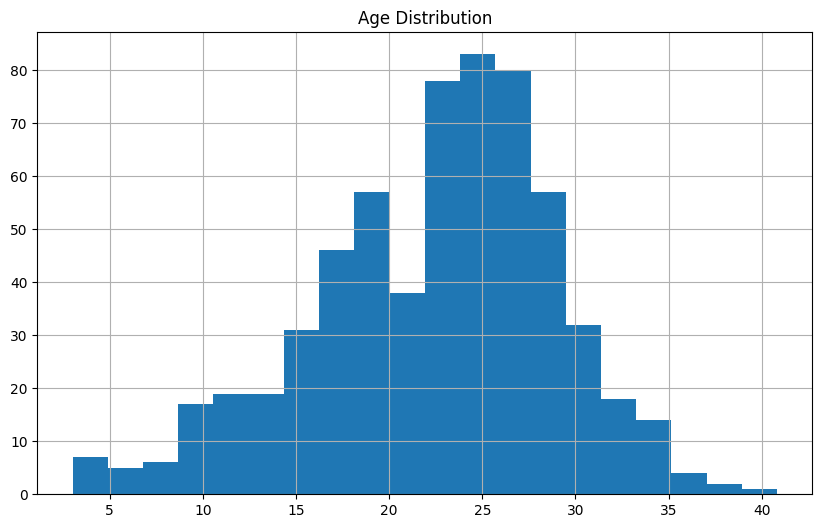

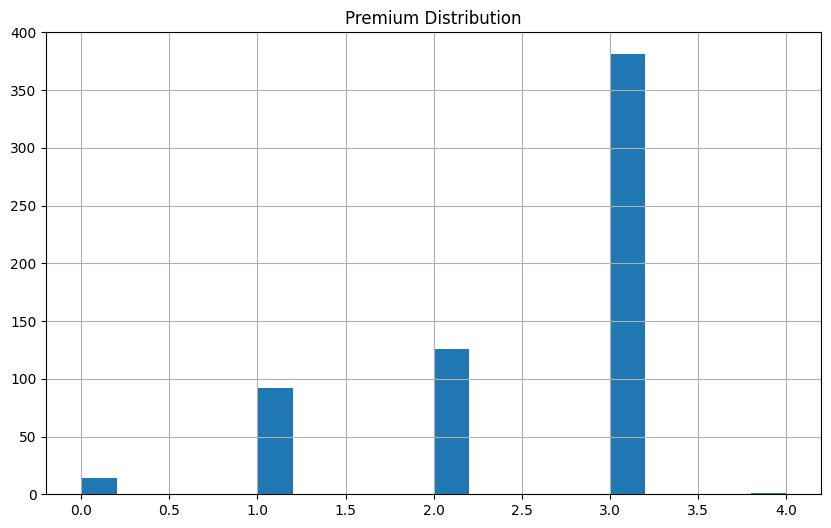

In [9]:
# Descriptive Statistics
age_stats = df['AGE'].describe()
premium_stats = df['PREMIUM_COUNT'].describe()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['AGE'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
df['PREMIUM_COUNT'].hist(bins=20)
plt.title('Premium Distribution')
plt.show()

In [10]:
# pip install statsmodels
df['GENDER'] = df['GENDER'].map({'MALE': 1, 'FEMALE': 0})

In [11]:
# Inferential Statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PREMIUM_COUNT ~ AGE + GENDER + C(PROD_TYPE)', data=df).fit()
print(model.summary())

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['AGE', 'GENDER']].copy()
X = pd.concat([X, pd.get_dummies(df['PROD_TYPE'])], axis=1)
y = df['PREMIUM_COUNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                            OLS Regression Results                            
Dep. Variable:          PREMIUM_COUNT   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.355
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00292
Time:                        00:17:49   Log-Likelihood:                -744.89
No. Observations:                 614   AIC:                             1504.
Df Residuals:                     607   BIC:                             1535.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [12]:
# Random Forest Model
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
print(f"Decision Tree R^2: {tree_model.score(X_test, y_test):.3f}")

Decision Tree R^2: -0.088


In [13]:
#Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
print(f"Gradient Boosting R^2: {gb_model.score(X_test, y_test):.3f}")

Gradient Boosting R^2: 0.109


In [14]:
# Support Vector Machine
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
print(f"Support Vector Regression R^2: {svr_model.score(X_test, y_test):.3f}")

Support Vector Regression R^2: -0.201


In [15]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
print(f"Decision Tree R^2: {tree_model.score(X_test, y_test):.3f}")

Decision Tree R^2: -0.088
